Retriever And Chain With Langchain

In [1]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("attention.pdf")
docs = loader.load()
docs

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
text_splitter.split_documents(docs)

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

In [5]:

documents=text_splitter.split_documents(docs)
documents

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

In [7]:
from langchain_community.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
# take all the document and convert to vector and store it in vectore store
db=FAISS.from_documents(documents,OpenAIEmbeddings())

In [8]:

db

In [9]:
query="An attention function can be described as mapping a query "
result=db.similarity_search(query)
result[0].page_content

'Instead of performing a single attention function with dmodel-dimensional keys, values and queries,\nwe found it beneficial to linearly project the queries, keys and values htimes with different, learned\nlinear projections to dk,dkanddvdimensions, respectively. On each of these projected versions of\nqueries, keys and values we then perform the attention function in parallel, yielding dv-dimensional\n4To illustrate why the dot products get large, assume that the components of qandkare independent random\nvariables with mean 0and variance 1. Then their dot product, q·k=Pdk\ni=1qiki, has mean 0and variance dk.\n4'

*Combine prompt along with chains and retriever and probably get the response based on the prompt*

Chains refer to sequences of calls - whether to an LLM, a tool, or a data preprocessing step. The primary supported way to do this is with LCEL.

LCEL is great for constructing your own chains, but it’s also nice to have chains that you can use off-the-shelf. There are two types of off-the-shelf chains that LangChain supports:

Chains that are built with LCEL. In this case, LangChain offers a higher-level constructor method. However, all that is being done under the hood is constructing a chain with LCEL.

[Legacy] Chains constructed by subclassing from a legacy Chain class. These chains do not use LCEL under the hood but are rather standalone classes.

create_stuff_documents_chain : This chain takes a list of documents and formats them all into a prompt, then passes that prompt to an LLM. It passes ALL documents, so you should make sure it fits within the context window the LLM you are using.

In [10]:
from langchain_community.llms import Ollama
## Load Ollama LAMA2 LLM model
llm=Ollama(model="llama2")
llm

Ollama()

In [11]:
## Design ChatPrompt Template
from langchain_core.prompts import ChatPromptTemplate
# here we are trying to create a Q&A chatbot based on the context ,it should provide the response
# Previously, we we have done using vector store is, we used to query the vector store by using similarity search algorithm
#but here what we are doing is, we are defining our own prompt
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context. 
Think step by step before providing a detailed answer. 
I will tip you $1000 if the user finds the answer helpful. 
<context>
{context}
</context>
Question: {input}""")
# why ariting in this way? --> because this chain and retriever will understand this, the context and input will also get autofilled
#{context} meanse all the document we want to analyse and {input} meanse what question we are going to ask
'''
Process : Take all the documents from the vector store --> put inside the particular prompt template --> send it to the llm 
--> get the response
'''

'\nProcess : Take all the documents from the vector store --> put inside the particular prompt template --> send it to the llm \n--> get the response\n'

In [12]:
## Chain Introduction
## Create Stuff Docment Chain
from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain=create_stuff_documents_chain(llm,prompt)

In [13]:
"""
Retrievers: A retriever is an interface that returns documents given
an unstructured query. It is more general than a vector store.
A retriever does not need to be able to store documents, only to 
return (or retrieve) them. ""Vector stores can be used as the backbone
of a retriever"",so there is a vector store which is having some vector stored in it.
If we want to take any data from there, we can actually do similarity search which we have 
already seen , but in langchain what it did is that, since we usually do a lot of 
programming in a way where in classes, interfaces are used, so it created a seperate interface
which is called Retriever and that interface has backend source to the particulat vector store
to retrieve any informations.
Whenever a query is given, that entire vector store will be passing the information thorugh
this retriever.
but there are other types of retrievers as well. 
https://python.langchain.com/docs/modules/data_connection/retrievers/   
"""

retriever=db.as_retriever()# to retrieve information, so db is our vector store, now we have connected to an interface which is basically this particular variable - retriever now
retriever

VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000021DD6E3E150>)

Now document chain and retriever is done. So now try to use this retriever and document chain both together(combine them) to get the response

In [14]:
"""
Retrieval chain:This chain takes in a user inquiry, which is then
passed to the retriever to fetch relevant documents. Those documents 
(and original inputs) are then passed to an LLM to generate a response
https://python.langchain.com/docs/modules/chains/
"""
#Create retriever chain by combining retriever & document_chain
from langchain.chains import create_retrieval_chain
retrieval_chain=create_retrieval_chain(retriever,document_chain)

In [15]:
response=retrieval_chain.invoke({"input":"Scaled Dot-Product Attention"})


In [15]:
response

{'input': 'Scaled Dot-Product Attention',
 'context': [Document(page_content='Scaled Dot-Product Attention\n Multi-Head Attention\nFigure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several\nattention layers running in parallel.\nof the values, where the weight assigned to each value is computed by a compatibility function of the\nquery with the corresponding key.\n3.2.1 Scaled Dot-Product Attention\nWe call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of\nqueries and keys of dimension dk, and values of dimension dv. We compute the dot products of the\nquery with all keys, divide each by√dk, and apply a softmax function to obtain the weights on the\nvalues.\nIn practice, we compute the attention function on a set of queries simultaneously, packed together\ninto a matrix Q. The keys and values are also packed together into matrices KandV. We compute\nthe matrix of outputs as:\nAttention( Q, K, V ) = softmax(Q

So the flow is:
Whenever the user ask for any enguiry --> it will go to retriever which is an interface to vector store , it has all the information --> goes to llm model with some prompt with the help of stuff document chain which already has both llm and prompt combined --> get response
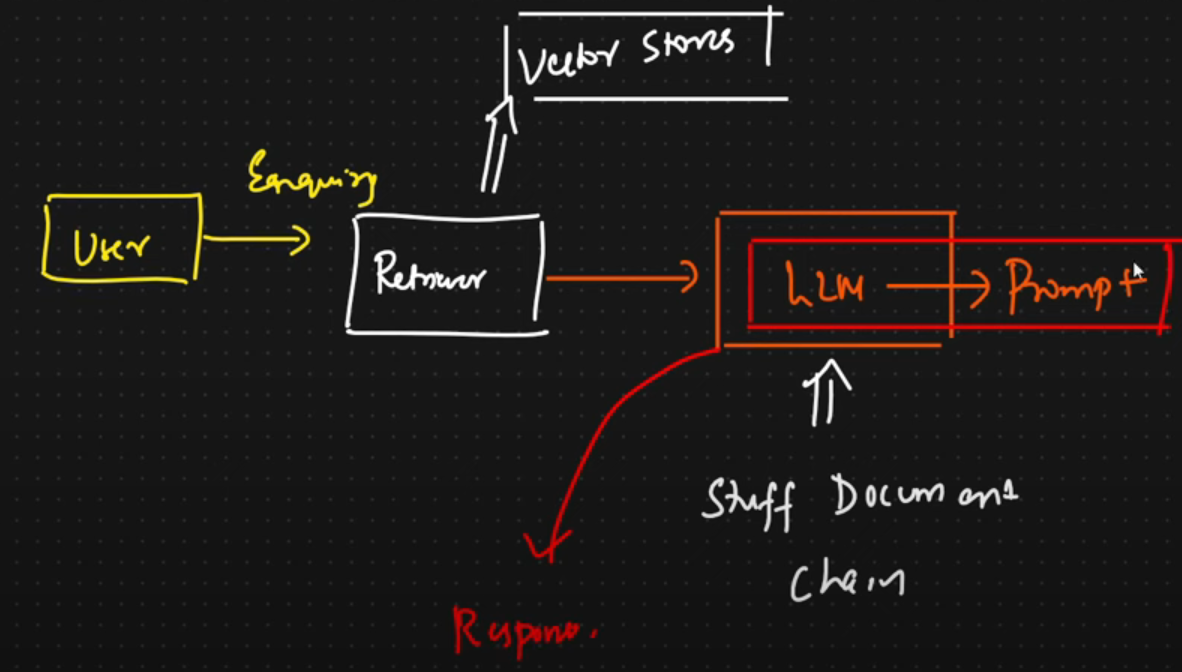

In [14]:
response['answer']

"Scaled Dot-Product Attention is a type of attention mechanism used in the Transformer architecture. In this mechanism, the weight assigned to each value is computed by a compatibility function of the query with the corresponding key. The scaling factor of 1√dk is applied to the dot products of the queries and keys before applying the softmax function to obtain the weights on the values.\n\nThe main advantage of Scaled Dot-Product Attention is that it allows for faster and more space-efficient computation compared to additive attention, as it can be implemented using highly optimized matrix multiplication code. However, for larger values of dk, the dot products can grow large in magnitude, leading to small gradients in the softmax function. To address this issue, Scaled Dot-Product Attention scales the dot products by 1√dk.\n\nIn contrast, Multi-Head Attention allows the model to jointly attend to information from different representation subspaces at different positions. Each head com